#  Health Insurance Cost Prediction



## Nivea Dabre



### Scope:

1.Introduction

2.Objective

3.Reading the dataset

4.Data Cleaning 

5.Exploratory Data Analysis

6.Preliminary Insights

7.Statistical/Machine Learning Methods

 a]Correlation between pairs of features
 
 b]Chi-Squared test
 
 c]t-test
 
 d]Linear Regression
 
 e]Multiple Regression

8.Interpretation from the Linear Regression and Multiple Regresion Models

9.Improvising the Model.

10.Prediction of the Target variable using improved multiple regression model.





### Introduction
We will import pandas to read our data from a CSV file and manipulate it for further use. We will also use numpy to convert out data into a format suitable to feed our classification model. We'll use seaborn and matplotlib for visualizations. We will then import Linear Regression algorithm from sklearn. This algorithm will help us build our classification model. Lastly, we will use joblib available in sklearn to save our model for future use.

### Objective
Medical expenses are difficult to estimate because the most costly conditions are rare and seemingly random. Still, some conditions are more prevalent for certain segments of the population. For instance, lung cancer is more likely among smokers than non-smokers, and heart disease may be more likely among the obese.

The goal of this project is to use patient data to estimate the average medical care expenses using regression for provided population segments.



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.externals import joblib

We have our data saved in a CSV file called insurance.csv. We first read our dataset in a pandas dataframe called insuranceDF, and then use the head() function to show the first five records from our dataset.

In [3]:
insuranceDF = pd.read_csv('C:/Users/admin/Downloads/insurance.csv')

In [4]:
insuranceDF.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
print(insuranceDF.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


###  The following features are provided
1]age : age of policyholder 

2]sex: gender of policy holder (female=0, male=1) 

3]bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 25 steps: average number of walking steps per day

4]children: number of children / dependents of policyholder

5]smoker: smoking state of policyholder (non-smoke=0;smoker=1) 

6]region: the residential area of policyholder in the US (northeast=0, northwest=1, southeast=2, southwest=3) charges: individual medical costs billed by health insurance

Below we have converted the data of independent variables such as sex,smoker,region in binary format as we will be performing logistisc regression on the same.

### Data cleaning and Exploratory Data analysis

In [6]:
print(insuranceDF.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [7]:
insuranceDF.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Let's also make sure that our data is clean (has no null values, etc).

In [8]:
insuranceDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


### Exploratory Data Analysis

Exploratory Data Analysis


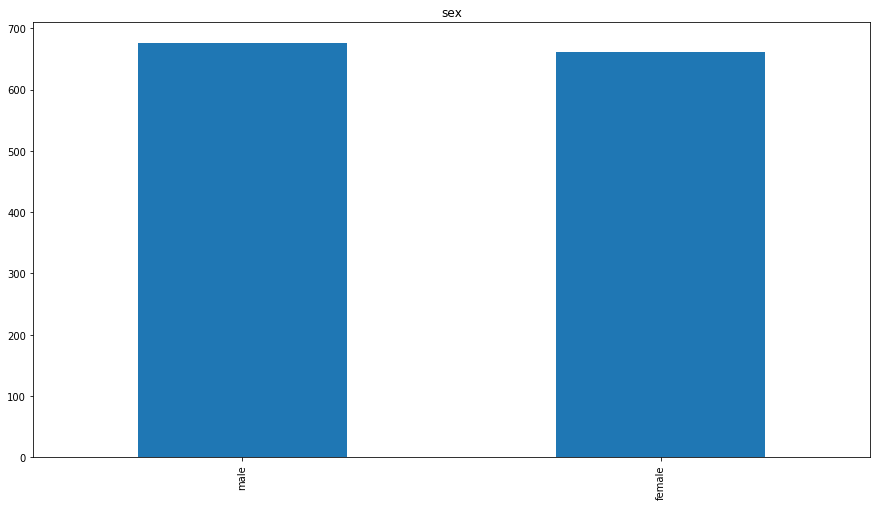

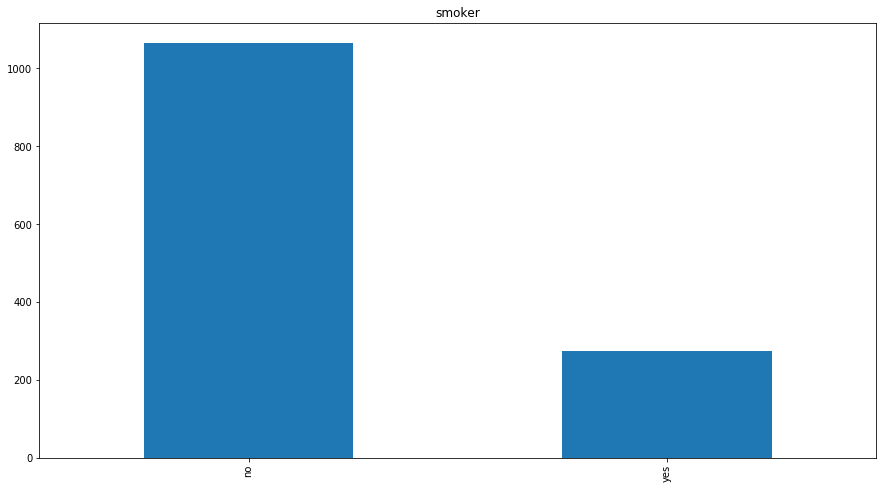

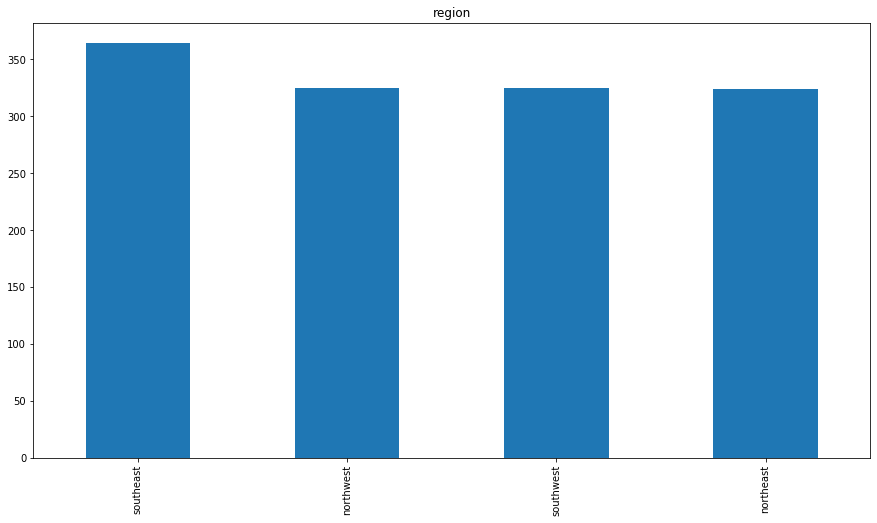

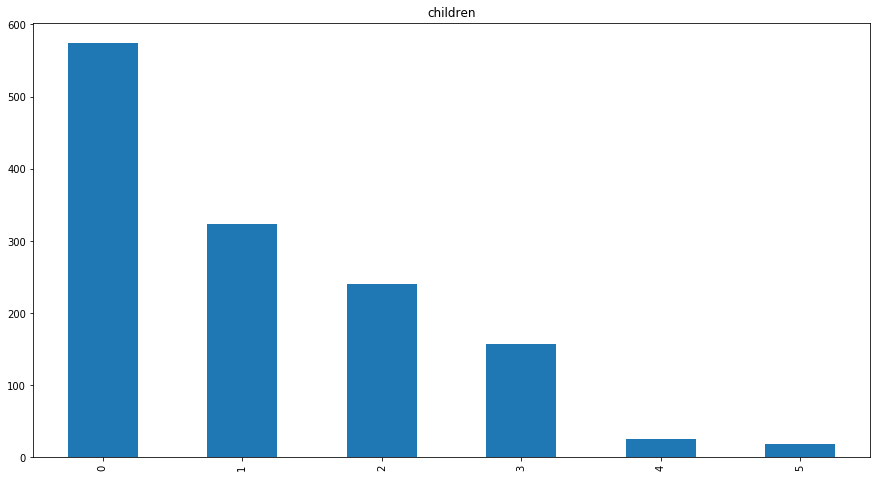

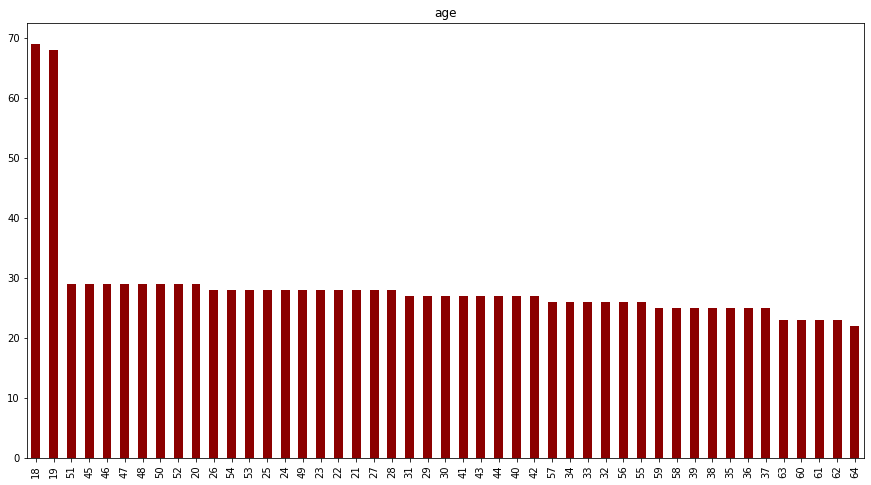

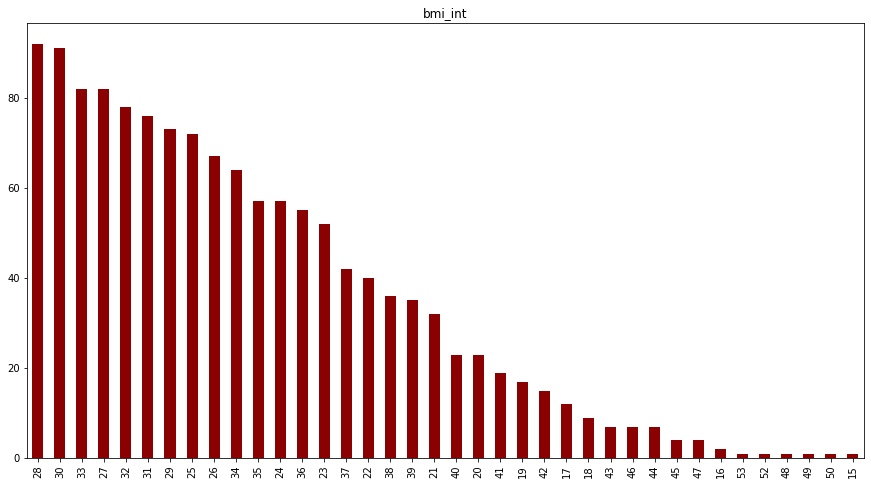

In [9]:
insuranceDF['bmi_int'] = insuranceDF['bmi'].apply(lambda x: int(x))
variables_1 = ['sex','smoker','region','children',]
variables_2 = ['age','bmi_int']
# data distribution analysys
print('Exploratory Data Analysis')
for v in variables_1:
    imsuranceDF = insuranceDF.sort_values(by=[v])
    insuranceDF[v].value_counts().plot(kind = 'bar')
    plt.title(v)
    fig=plt.gcf()
    fig.set_size_inches(15,8)
    plt.show()
for v in variables_2:
    imsuranceDF = insuranceDF.sort_values(by=[v])
    insuranceDF[v].value_counts().plot(kind = 'bar', color='darkred')
    plt.title(v)
    fig=plt.gcf()
    fig.set_size_inches(15,8)
    plt.show()



###### The data visualization will focus on identifying patterns of key features  which clearly distinguishes a patient’s charges. Some fill identifies if the patient is a smoker.



### AGE

Text(0.5, 1, 'Plot for Charges & Age')

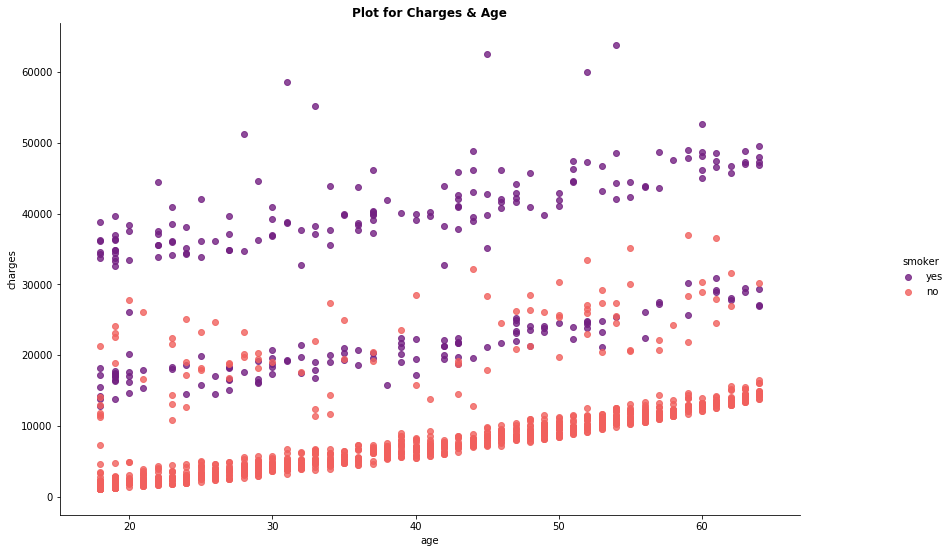

In [10]:
sns.lmplot(x='age', y='charges', hue='smoker',data= insuranceDF,fit_reg=False,palette="magma")
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.title("Plot for Charges & Age", weight='bold')

##### Seems like higher charges are associated with smokers of older age. Perhaps the older the smoker gets, the more complicated his health conditions which results in higher charges.

### BMI

Text(0.5, 1, 'Plot for Charges & BMI')

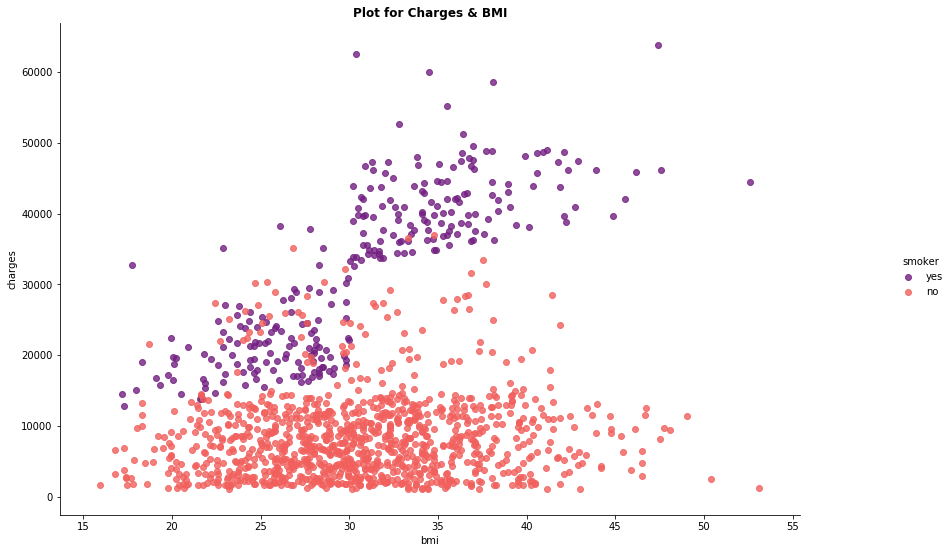

In [11]:
sns.lmplot(x='bmi', y='charges', hue='smoker',data= insuranceDF,fit_reg=False,palette="magma")
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.title("Plot for Charges & BMI", weight='bold')

###### Seems like higher charges are slightly associated with smokers with higher bmi. Perhaps the higher bmi of the smoker, the more prone to deseases which results in higher charges.

### Region

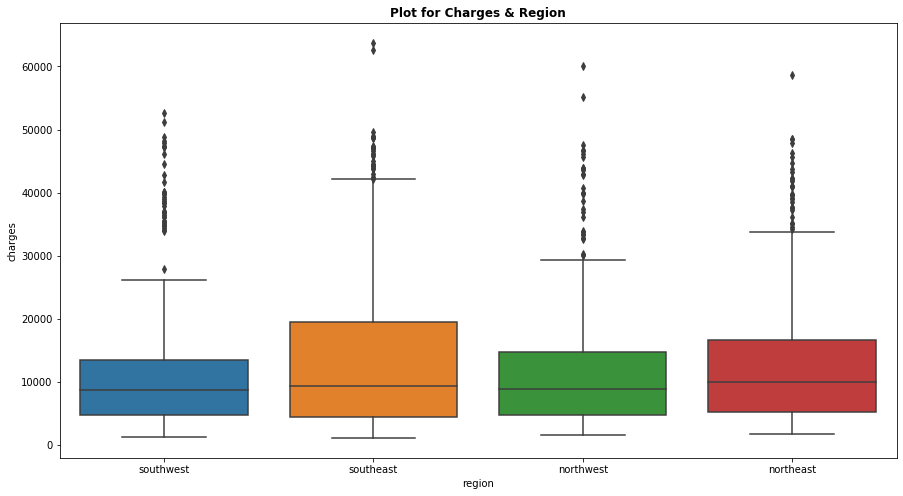

In [12]:
sns.boxplot(x = "region", y = "charges", data = insuranceDF)
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.title("Plot for Charges & Region", weight='bold')
plt.show()

##### As for region, there is no clear association of charges. Hence, expect low correlation for this feature. Perhaps having high charges is independent of region.

### Gender

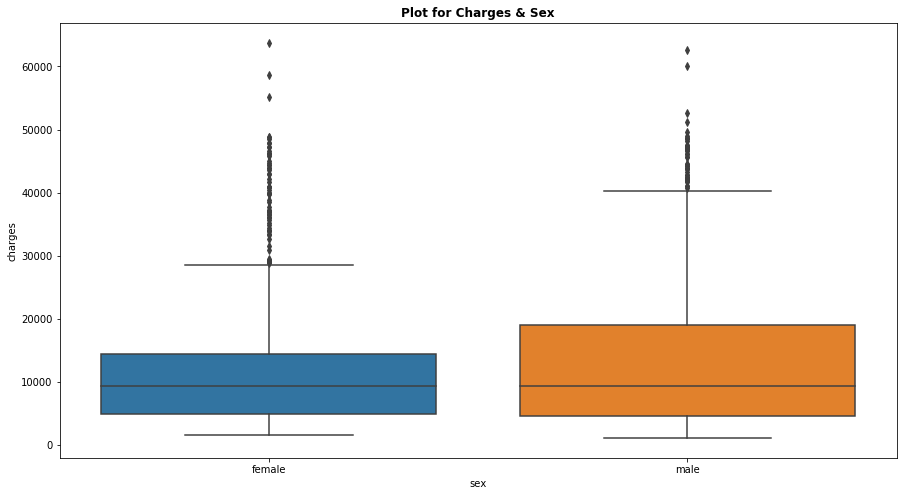

In [13]:
sns.boxplot(x = "sex", y = "charges", data = insuranceDF)
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.title("Plot for Charges & Sex", weight='bold')
plt.show()

###### Higher charges are associated with males. This is because males are more common smokers than females.

### No. of children

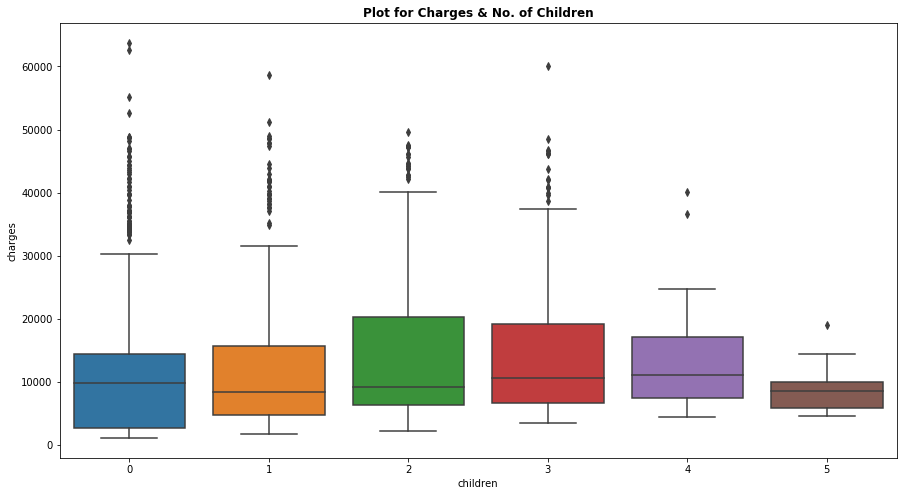

In [14]:
sns.boxplot(x = "children", y = "charges", data = insuranceDF)
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.title("Plot for Charges & No. of Children", weight='bold')
plt.show()

###### As for number of children, there is no clear association of charges. Hence, expect low correlation for this feature. Perhaps having high charges is independent of number of childrens.

### Preliminary Insights
Based on data exploration, the following preliminary insights which leads to higher medical charges is identified:

1) older age

2) smoker

3) male

4) higher bmi (distinct after bmi > 30)

Also from the correlation segment of the heatmap, age and bmi has the largest correlation to charges.

## Statistical/Machine Learning Methods:


### a] Correlation between pairs of features.

 We have found the  correlation of every pair of features (and the outcome variable), and visualize the correlations using a heatmap.

In [15]:
insuranceCor=insuranceDF.corr()
print(insuranceCor)

               age       bmi  children   charges   bmi_int
age       1.000000  0.109272  0.042469  0.299008  0.108437
bmi       0.109272  1.000000  0.012759  0.198341  0.998883
children  0.042469  0.012759  1.000000  0.067998  0.011097
charges   0.299008  0.198341  0.067998  1.000000  0.196188
bmi_int   0.108437  0.998883  0.011097  0.196188  1.000000


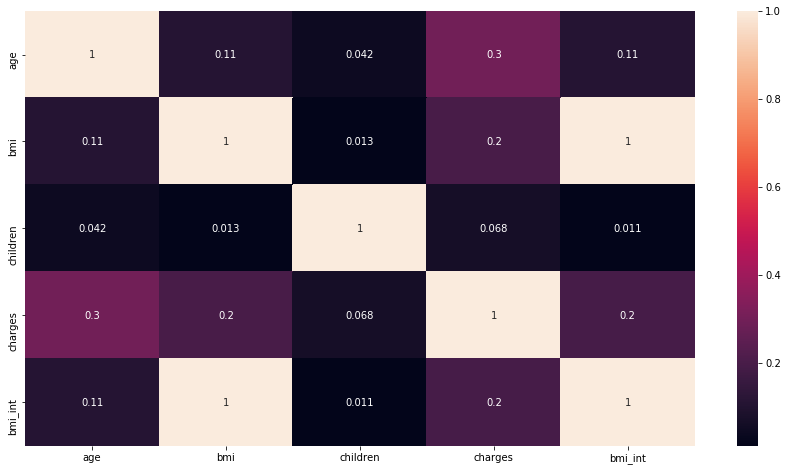

In [16]:
cat=insuranceDF.select_dtypes(include="object").columns
num=insuranceDF.select_dtypes(exclude="object").columns
sns.heatmap(insuranceCor, 
        xticklabels=insuranceCor.columns,
        yticklabels=insuranceCor.columns,annot=True,cbar=True)
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

#### In the above heatmap, brighter colors indicate more correlation.

#### Also a positive correlation can be seen between bmi-charges and age-charges.

### b] Chi Squared test

The Chi Square statistic is commonly used for testing relationships between categorical variables.  The null hypothesis of the Chi-Square test is that no relationship exists on the categorical variables in the population; they are independent.

Here we are performing Chi Squared test for categorical variables smoker and sex to test if they are independent.


### With Chi-Squared test let us check if they are statiscally significant or not.

In [19]:
#Generating Contigency Table for smoker and sex.
tab1=pd.crosstab(df_bis['smoker'], df_bis['sex'])
print(tab1)


NameError: name 'df_bis' is not defined

In [18]:
#Implementation of Chi -Squared test which is a part of scipy.stats package
import scipy.stats as st
#st.chi2_contingency(_)

stat, p, dof, expected = st.chi2_contingency(tab1)
print('dof=%f' % dof)
print('pvalue=%f' % p)
print('stats=%f' % stat)
print(expected)

NameError: name 'tab1' is not defined

As per above test, P value is very small(0.006548). Hence, we reject the null hypothesis that smoker and sex are independent.
This can also be crossed checked with our data exploratory analysis which says that males are more common smokers then females and so higher charges are assocciated with them.

### c] t - test
A t-test is a type of inferential statistic used to determine if there is a significant difference between the means of two groups, which may be related in certain features.
Here we are implementing T test for 
1. Sex and BMI
   Null Hypothesis = Mean BMI for Male and Female are equal
2.Smoker and Charges
    Null Hypothesis = Mean charges for smoker and non somker are smiliar


In [122]:
#t test for sex and BMI
from scipy import stats
df_ttest = insuranceDF[['bmi','sex']]
df_ttest.head()
female_bmi = df_ttest[df_ttest['sex'] == 0]['bmi']
male_bmi = df_ttest[df_ttest['sex'] == 1]['bmi']
#Mean values for Male and Female BMI
print("\nmean of female bmis: \n",female_bmi.mean())
print("\nmean of male bmis: \n",male_bmi.mean())
#Implementation of t test
stats.ttest_ind(female_bmi, male_bmi)



mean of female bmis: 
 nan

mean of male bmis: 
 nan


Ttest_indResult(statistic=nan, pvalue=nan)

We find that the mean bmi of female patients (30.377749244713023) is slightly different from the mean bmi of the male patients (30.943128698224832).
Our null hypothesis is that both groups are statistically significantly similar. Here, the p-value is greater than 0.05 (pvalue=0.08997637178984932), therefore, we accept the null hypothesis that these two groups are significantly similar. Even though the mean is slightly different, their level of variance is not different. So BMI and Gender are statistically significant.

In [123]:
#t test for smoker non smoker vs charges
from scipy import stats
df_ttest2 = insuranceDF[['charges','smoker']]
print(df_ttest2.head())
smoker_charges = df_ttest2[df_ttest2['smoker'] == 1]['charges']
nonsmoker_charges = df_ttest2[df_ttest2['smoker'] == 0]['charges']
#Mean values for smoker and non smoker charges
print("\nmean of charges for smokers: \n",smoker_charges.mean())
print("\nmean of charges for no smokers: \n",nonsmoker_charges.mean())
#Implementation of t test
stats.ttest_ind(smoker_charges, nonsmoker_charges)


       charges smoker
0  16884.92400    yes
1   1725.55230     no
2   4449.46200     no
3  21984.47061     no
4   3866.85520     no

mean of charges for smokers: 
 nan

mean of charges for no smokers: 
 nan


Ttest_indResult(statistic=nan, pvalue=nan)

We find that the mean charges for smokers (32050.23183153285) is different from the mean charges for nonsmokers (30.943128698224832). However, we need to perform an Independent t-Test to find if the difference is statistically significant or not.
Our null hypothesis is that both groups are statistically significantly similar. Here, the p-value is smaller than 0.05 (pvalue=8.271435842177219e-283), therefore, we reject the null hypothesis that these two groups are significantly similar. So, there Even though the mean is slightly different, their level of variance is not different.

### d] Linear Regression
Simple linear regression is useful for finding relationship between two continuous variables. One is predictor or independent variable and other is response or dependent variable. It looks for statistical relationship but not deterministic relationship. 

In [124]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='charges ~ bmi', data=insuranceDF).fit()

print("Coefficients: \n\n",lm.params)
print("\n Pvalues: \n\n",lm.pvalues)
print("\n R Squared: \n\n",lm.rsquared)

Coefficients: 

 Intercept    1192.937209
bmi           393.873031
dtype: float64

 Pvalues: 

 Intercept    4.737685e-01
bmi          2.459086e-13
dtype: float64

 R Squared: 

 0.03933913991786264


### Bmi: Increase of Bmi by 1 unit increases annual charges of $393.87

In [125]:
#Linear regression for smoker
lm = smf.ols(formula='charges ~ smoker', data=insuranceDF).fit()
print("Coefficients: \n\n",lm.params)
print("\n Pvalues: \n\n",lm.pvalues)
print("\n R Squared: \n\n",lm.rsquared)


Coefficients: 

 Intercept         8434.268298
smoker[T.yes]    23615.963534
dtype: float64

 Pvalues: 

 Intercept        1.581020e-205
smoker[T.yes]    8.271436e-283
dtype: float64

 R Squared: 

 0.6197648148218988


### Smoker: Being a smoker increases charges by $23,615.96 annually

What if certain features have a combined impact on the dependent variable? For instance, smoking and obesity may combined effect may be worse than the sum of each one alone. In other words, these two features have interaction.

To implement interaction in the model, the following is done 

In [126]:
#Linear regression for BMI

insuranceDF['bmi30'] = np.where(insuranceDF['bmi'] >= 30, '1','0')
lm = smf.ols(formula='charges ~ bmi30*smoker', data=insuranceDF).fit()

print("Coefficients: \n\n",lm.params)
print("\n Pvalues: \n\n",lm.pvalues)
print("\n R Squared: \n\n",lm.rsquared)

Coefficients: 

 Intercept                    7977.029520
bmi30[T.1]                    865.662027
smoker[T.yes]               13386.187496
bmi30[T.1]:smoker[T.yes]    19329.110797
dtype: float64

 Pvalues: 

 Intercept                   1.234844e-153
bmi30[T.1]                   1.711788e-02
smoker[T.yes]                1.280431e-98
bmi30[T.1]:smoker[T.yes]    5.793747e-107
dtype: float64

 R Squared: 

 0.7627704349331891


## e] Multiple Regression
Multiple regression is to learn more about the relationship between several independent or predictor variables and a dependent or criterion variable.

In [127]:
#Multiple linear regression for all the variables
lm = smf.ols(formula='charges ~ bmi + sex + region + smoker +children+age', data=insuranceDF).fit()
#lm = smf.ols(formula='charges ~ .', data=insuranceDF).fit()

print("Coefficients: \n\n",lm.params)
print("\n Pvalues: \n\n",lm.pvalues)
print("\n R Squared: \n\n",lm.rsquared)

print(lm.summary())

Coefficients: 

 Intercept             -11938.538576
sex[T.male]             -131.314359
region[T.northwest]     -352.963899
region[T.southeast]    -1035.022049
region[T.southwest]     -960.050991
smoker[T.yes]          23848.534542
bmi                      339.193454
children                 475.500545
age                      256.856353
dtype: float64

 Pvalues: 

 Intercept              5.579044e-32
sex[T.male]            6.933475e-01
region[T.northwest]    4.587689e-01
region[T.southeast]    3.078174e-02
region[T.southwest]    4.476493e-02
smoker[T.yes]          0.000000e+00
bmi                    6.498194e-31
children               5.769682e-04
age                    7.783217e-89
dtype: float64

 R Squared: 

 0.7509130345985207
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:            

##  Interpretation from the above model
p-value: Small p values suggests likely to have relationship with charges and the coefficient is not zero. Indicates statistically significant. Many of the features are statistically significant, so it’s not a concern

Multiple R-squared: This is a measure of how much of variation is explained by the model. In this case, 75% of the variation is explained by the dependent variable.

## Improvising the model
Accounting Non-linear Relationship
In linear regression, the relationship between an independent variable and the dependent variable may not necessarily be linear. For example, the effect of age on medical charges may not be constant throughout all the age values. This can be represented in a polynomial:

y=α+β1x+β2x2
To add non linear (higher order) age to the model, the following is done

In [128]:
insuranceDF['age2'] = insuranceDF['age']**2
print(insuranceDF.head())

   age     sex     bmi  children smoker     region      charges  bmi_int  \
0   19  female  27.900         0    yes  southwest  16884.92400       27   
1   18    male  33.770         1     no  southeast   1725.55230       33   
2   28    male  33.000         3     no  southeast   4449.46200       33   
3   33    male  22.705         0     no  northwest  21984.47061       22   
4   32    male  28.880         0     no  northwest   3866.85520       28   

  bmi30  age2  
0     0   361  
1     1   324  
2     1   784  
3     0  1089  
4     0  1024  


In [129]:
#Multiple linear regression for all the variables
insuranceDF['age2'] = insuranceDF['age']**2
lm = smf.ols(formula='charges ~ bmi + sex + region + smoker +children+age2', data=insuranceDF).fit()
#lm = smf.ols(formula='charges ~ .', data=insuranceDF).fit()

print("Coefficients: \n\n",lm.params)
print("\n Pvalues: \n\n",lm.pvalues)
print("\n R Squared: \n\n",lm.rsquared)

print(lm.summary())

Coefficients: 

 Intercept              -7549.010838
sex[T.male]             -136.392924
region[T.northwest]     -365.086879
region[T.southeast]    -1030.403888
region[T.southwest]     -957.649764
smoker[T.yes]          23858.682686
bmi                      335.566763
children                 612.912484
age2                       3.253716
dtype: float64

 Pvalues: 

 Intercept              7.854870e-16
sex[T.male]            6.804647e-01
region[T.northwest]    4.409835e-01
region[T.southeast]    3.061215e-02
region[T.southwest]    4.413172e-02
smoker[T.yes]          0.000000e+00
bmi                    1.350427e-30
children               8.260844e-06
age2                   5.229296e-92
dtype: float64

 R Squared: 

 0.7536308257792028
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.752
Method:            

Suppose the effect of a feature is not cumulative, rather it has an effect only after a specific threshold has been reached. For instance, BMI may have zero impact on medical expenditures for individuals in the normal weight range, but it may be strongly related to higher costs for the obese (BMI of 30 or above).

This relationship can be modeled by binary coding using the following code




In [130]:
insuranceDF['bmi30'] = np.where(insuranceDF['bmi'] >= 30, '1','0')
lm_model = smf.ols(formula='charges ~ bmi + sex + region + smoker +children+age+age2+bmi30*smoker', data=insuranceDF).fit()
#lm = smf.ols(formula='charges ~ .', data=insuranceDF).fit()

print("Coefficients: \n\n",lm_model.params)
print("\n Pvalues: \n\n",lm_model.pvalues)
print("\n R Squared: \n\n",lm_model.rsquared)

print(lm_model.summary())

Coefficients: 

 Intercept                     134.250895
sex[T.male]                  -496.824457
region[T.northwest]          -279.203806
region[T.southeast]          -828.546726
region[T.southwest]         -1222.643652
smoker[T.yes]               13404.686598
bmi30[T.1]                  -1000.140322
bmi30[T.1]:smoker[T.yes]    19810.753339
bmi                           120.019552
children                      678.561198
age                           -32.685149
age2                            3.731576
dtype: float64

 Pvalues: 

 Intercept                    9.215386e-01
sex[T.male]                  4.223958e-02
region[T.northwest]          4.242121e-01
region[T.southeast]          1.860442e-02
region[T.southwest]          5.025671e-04
smoker[T.yes]               5.331521e-155
bmi30[T.1]                   1.815914e-02
bmi30[T.1]:smoker[T.yes]    5.577129e-173
bmi                          4.760908e-04
children                     2.036225e-10
age                          5.849147e-01


In [132]:

dfTrain = insuranceDF[:1238]
dfTest = insuranceDF[1238:1338]
dfTrain.head()
dfTest.head()


,age,sex,bmi,children,smoker,region,charges,bmi_int,bmi30,age2
1238,37,male,22.705,3,no,northeast,6985.50695,22,0,1369
1239,25,female,42.130,1,no,southeast,3238.43570,42,1,625
1240,52,male,41.800,2,yes,southeast,47269.85400,41,1,2704
1241,64,male,36.960,2,yes,southeast,49577.66240,36,1,4096
1242,22,female,21.280,3,no,northwest,4296.27120,21,0,484


In [133]:

lm_model = smf.ols(formula='charges ~ bmi + sex + region + smoker +children+age+age2+bmi30*smoker', data=dfTrain).fit()
#lm = smf.ols(formula='charges ~ .', data=insuranceDF).fit()

print("Coefficients: \n\n",lm_model.params)
print("\n Pvalues: \n\n",lm_model.pvalues)
print("\n R Squared: \n\n",lm_model.rsquared)

print(lm_model.summary())

Coefficients: 

 Intercept                     462.045550
sex[T.male]                  -582.246895
region[T.northwest]          -208.704140
region[T.southeast]          -787.874287
region[T.southwest]         -1218.502371
smoker[T.yes]               13296.685973
bmi30[T.1]                  -1015.140736
bmi30[T.1]:smoker[T.yes]    19814.712388
bmi                           120.561888
children                      654.862214
age                           -46.795016
age2                            3.891544
dtype: float64

 Pvalues: 

 Intercept                    7.471007e-01
sex[T.male]                  2.261013e-02
region[T.northwest]          5.664843e-01
region[T.southeast]          3.171482e-02
region[T.southwest]          9.274128e-04
smoker[T.yes]               3.464313e-137
bmi30[T.1]                   2.145462e-02
bmi30[T.1]:smoker[T.yes]    8.678280e-157
bmi                          8.235600e-04
children                     5.078726e-09
age                          4.552416e-01


In [139]:
lm_pred = lm_model.predict(dfTest)

print(lm_pred)

print(testLabel)



1238     8177.851674
1239     5655.504936
1240    45626.788604
1241    49898.758703
1242     5637.502170
1243     4391.545008
1244     2513.661456
1245     6605.971603
1246    10081.172062
1247     7518.920984
1248     3878.355004
1249    39172.915753
1250    17891.294942
1251     1564.163893
1252    15870.039242
1253     9750.125775
1254     5923.741595
1255     7696.991672
1256    13324.792817
1257    13061.949668
1258    14365.728002
1259    11346.065380
1260     5423.476458
1261     4514.574176
1262     8333.884938
1263     8686.485778
1264    11827.407753
1265    28198.045703
1266    11103.736003
1267    36839.760526
            ...     
1308    36243.109678
1309     7461.063273
1310     8397.836485
1311     6165.397347
1312     6380.717552
1313    37348.764971
1314    20465.044976
1315     4366.318016
1316     2242.860299
1317     4900.786836
1318     9400.935692
1319     8829.685349
1320     6654.924155
1321    28452.689970
1322    14816.007483
1323    42846.530407
1324     5741

In [142]:
df = pd.DataFrame({'Actual': testLabel, 'Predicted': lm_pred})
print(df)

           Actual     Predicted
1238   6985.50695   8177.851674
1239   3238.43570   5655.504936
1240  47269.85400  45626.788604
1241  49577.66240  49898.758703
1242   4296.27120   5637.502170
1243   3171.61490   4391.545008
1244   1135.94070   2513.661456
1245   5615.36900   6605.971603
1246   9101.79800  10081.172062
1247   6059.17300   7518.920984
1248   1633.96180   3878.355004
1249  37607.52770  39172.915753
1250  18648.42170  17891.294942
1251   1241.56500   1564.163893
1252  16232.84700  15870.039242
1253  15828.82173   9750.125775
1254   4415.15880   5923.741595
1255   6474.01300   7696.991672
1256  11436.73815  13324.792817
1257  11305.93455  13061.949668
1258  30063.58055  14365.728002
1259  10197.77220  11346.065380
1260   4544.23480   5423.476458
1261   3277.16100   4514.574176
1262   6770.19250   8333.884938
1263   7337.74800   8686.485778
1264  10370.91255  11827.407753
1265  26926.51440  28198.045703
1266  10704.47000  11103.736003
1267  34254.05335  36839.760526
...     

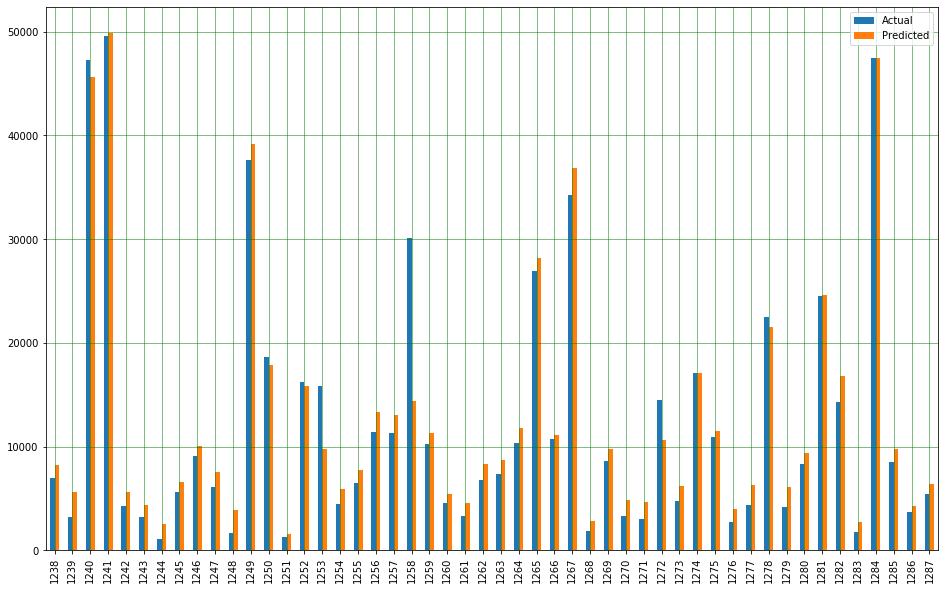

In [147]:
df1 = df.head(50)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Prediction of the Target variable using improved multiple regression model.

In [131]:
data = {'age': [50], 'sex': ['female'], 'bmi': [33], 'children': [2], 'smoker': ['yes'], 'region': ['northwest'], 'age2': [2500], 'bmi30' : ['1']}
test = pd.DataFrame(data)
print(test)

lm_pred = lm_model.predict(test)

print(lm_pred)

   age     sex  bmi  children smoker     region  age2 bmi30
0   50  female   33         2    yes  northwest  2500     1
0    45082.795676
dtype: float64


## Citations:
https://www.datavedas.com/inferential-statistics-in-python/

https://machinelearningmastery.com/chi-squared-test-for-machine-learning/

https://www.investopedia.com/terms/t/t-test.asp

https://towardsdatascience.com/linear-regression-detailed-view-ea73175f6e86
